# SARABANDE Parallelization Comparison

## Preamble

In [1]:
#Preamble
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import astropy.io.fits as pyf
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("light_mode")

## Load in Timing Data

In [2]:
percents_df_parallel = pd.read_csv("paper_data/percents.csv")
percents_df = pd.read_csv("paper_data/percents_non_parallelized.csv")

percents_4pcf = percents_df_parallel['4PCF']
percents_3pcf = percents_df['4PCF']

## Plot Data

In [3]:
# percents = np.array(dt_components_3pcf) / sum(dt_components_3pcf) * 100
explode = [0.05,0.02,0.02,0.02]
labels_full= ['Initialize Data & Save $Y_{\ell m}$', 'Create Harmonic Kernels', 'Calculate $a_{\ell m}$ Coefficients', 'Combine Coefficients']

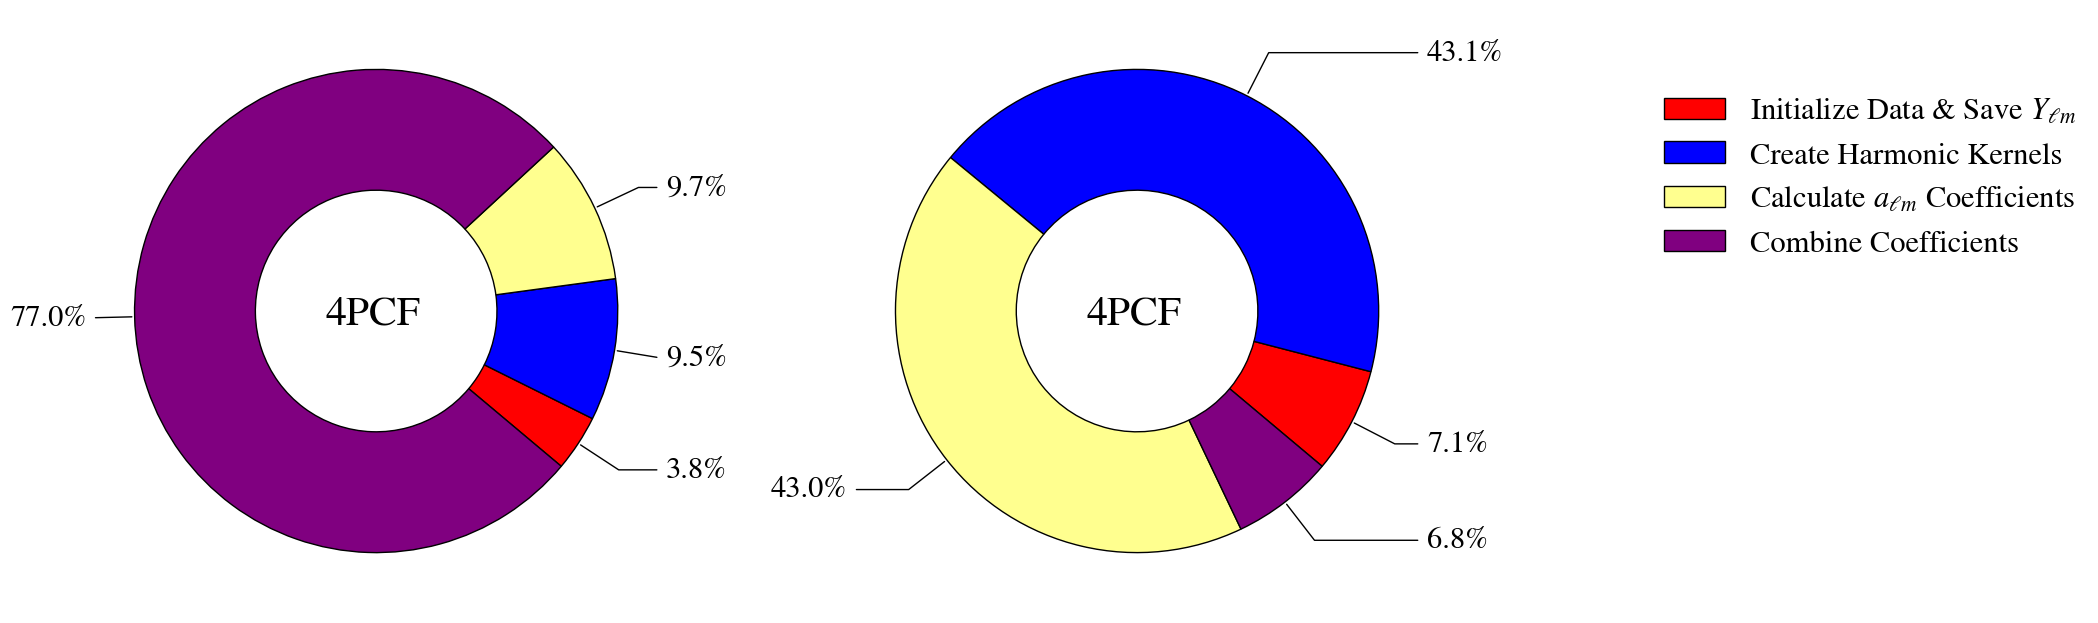

In [4]:
fig, ax = plt.subplots(1,2, figsize=(18, 8), subplot_kw=dict(aspect="equal"))

outer_colors = ['red', 'blue', '#FFFF8F', 'purple']


wedges, texts = ax[0].pie(percents_3pcf,startangle=-40,wedgeprops=dict(width=0.5, edgecolor='k'),colors=outer_colors, textprops=dict(color='k', fontsize=16))

bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="w", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if i == 0:
        ax[0].annotate("{0:0.1f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 1:
        ax[0].annotate("{0:0.1f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 2:
        ax[0].annotate("{0:0.1f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        
    else:
        ax[0].annotate("{0:0.1f}%".format(percents_3pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        
# ax[0].set_title("Not Parallelized", fontsize=50)
ax[0].text(-0.21,-0.05, "4PCF", fontsize=30)


###########################
#      Top Right
###########################
wedges, texts = ax[1].pie(percents_4pcf,startangle=-40,wedgeprops=dict(width=0.5, edgecolor='k'),colors=outer_colors, textprops=dict(color='k', fontsize=16))

bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="w", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if i == 0:
        ax[1].annotate("{0:0.1f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 1:
        ax[1].annotate("{0:0.1f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
    elif i == 2:
        ax[1].annotate("{0:0.1f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        
    else:
        ax[1].annotate("{0:0.1f}%".format(percents_4pcf[i]), xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
        

ax[1].text(-0.21,-0.05, "4PCF", fontsize=30)
# ax[1].set_title("Parallelized", fontsize=50)
ax[1].legend(wedges, labels_full , frameon=False, bbox_to_anchor=(1.6, 0.4, 0.5, 0.5))

# fig.tight_layout()
# fig.savefig("compare_parallelization.pdf", dpi=300, bbox_inches="tight")
plt.show()